<a href="https://colab.research.google.com/github/Nzaya/Autolib-Hypothesis/blob/master/Moringa_Data_Science_Core_W3_Independent_Project_2019_06_Sharon_Nzaya_Python_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# QUESTION

Identify some areas and periods of interest via sampling stating the reason to the choice of method, then perform hypothesis testing with regards to the claim that we will have made. An example of claim to test would be "Is the number of Bluecars taken in area X different than in area Y? Is it greater in area X than in area Z? Etc”. The selected periods of interest be either weekdays or weekends but not a mix of both. You can also consider postal codes 75015 vs 75017 to some of the areas of interest. 

# **HYPOTHESIS**

Is the number of Bluecars taken sum greater than the numbers of Utilib 14 taken sum during the weekday?


# METRICS OF SUCCESS

# Importing libraries to be used

In [68]:
!pip installpymc

MessageError: ignored

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import pandas_profiling
import warnings
import random
#plt.style.use('seaborn-darkgrid')
#print('Running on PyMC3 v{}'.format(pm.__version__))
warnings.filterwarnings('ignore')
%matplotlib inline

# Loading our dataset

In [0]:
#Loading our dataset in a dataframe and previewing the first five rows

postal=pd.read_csv("/content/autolib_daily_events_postal_code (1).csv")
postal.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [0]:
#Previewing the last five rows

postal.tail()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


# DATA CLEANING

# Accessing information about our dataset

In [0]:
postal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
Postal code               16085 non-null int64
date                      16085 non-null object
n_daily_data_points       16085 non-null int64
dayOfWeek                 16085 non-null int64
day_type                  16085 non-null object
BlueCars_taken_sum        16085 non-null int64
BlueCars_returned_sum     16085 non-null int64
Utilib_taken_sum          16085 non-null int64
Utilib_returned_sum       16085 non-null int64
Utilib_14_taken_sum       16085 non-null int64
Utilib_14_returned_sum    16085 non-null int64
Slots_freed_sum           16085 non-null int64
Slots_taken_sum           16085 non-null int64
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


# Previewing statistics of our dataset

In [0]:
postal.shape

(16085, 13)

In [0]:
postal.size

209105

In [0]:
postal.dtypes

Postal code                int64
date                      object
n_daily_data_points        int64
dayOfWeek                  int64
day_type                  object
BlueCars_taken_sum         int64
BlueCars_returned_sum      int64
Utilib_taken_sum           int64
Utilib_returned_sum        int64
Utilib_14_taken_sum        int64
Utilib_14_returned_sum     int64
Slots_freed_sum            int64
Slots_taken_sum            int64
dtype: object

In [0]:
pandas_profiling.ProfileReport(postal)

Number of variables,13
Number of observations,16085
Total Missing (%),0.0%
Total size in memory,1.6 MiB
Average record size in memory,104.0 B
Numeric,5
Categorical,2
Boolean,0
Date,0
Text (Unique),0
Rejected,6


# Checking and Improving on Completeness

In [0]:
#Finding null values in our dataset

postal.isnull().sum()

Postal code               0
date                      0
n_daily_data_points       0
dayOfWeek                 0
day_type                  0
BlueCars_taken_sum        0
BlueCars_returned_sum     0
Utilib_taken_sum          0
Utilib_returned_sum       0
Utilib_14_taken_sum       0
Utilib_14_returned_sum    0
Slots_freed_sum           0
Slots_taken_sum           0
dtype: int64

In [0]:
#Completeness of our dataset, if they are equal

postal.notnull().sum()

Postal code               16085
date                      16085
n_daily_data_points       16085
dayOfWeek                 16085
day_type                  16085
BlueCars_taken_sum        16085
BlueCars_returned_sum     16085
Utilib_taken_sum          16085
Utilib_returned_sum       16085
Utilib_14_taken_sum       16085
Utilib_14_returned_sum    16085
Slots_freed_sum           16085
Slots_taken_sum           16085
dtype: int64

# Improving Consistency

In [0]:
#Checking for duplicate values

postal.duplicated().sum()

0

# Enhancing Uniformity

In [0]:
#converting column names to lower case
postal.columns = postal.columns.str.lower()
postal.head()


,postal code,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


# EXPLORATORY DATA ANALYSIS

# Univariate Analysis

In [0]:
postal.columns

Index(['Postal code', 'date', 'n_daily_data_points', 'dayOfWeek', 'day_type',
       'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum'],
      dtype='object')

In [0]:
postal.describe().T

,count,mean,std,min,25%,50%,75%,max
Postal code,16085.0,88791.293876,7647.342000,75001.0,91330.0,92340.0,93400.0,95880.0
n_daily_data_points,16085.0,1431.330619,33.212050,1174.0,1439.0,1440.0,1440.0,1440.0
dayOfWeek,16085.0,2.969599,2.008378,0.0,1.0,3.0,5.0,6.0
BlueCars_taken_sum,16085.0,125.926951,185.426579,0.0,20.0,46.0,135.0,1352.0
BlueCars_returned_sum,16085.0,125.912714,185.501535,0.0,20.0,46.0,135.0,1332.0
Utilib_taken_sum,16085.0,3.698290,5.815058,0.0,0.0,1.0,4.0,54.0
Utilib_returned_sum,16085.0,3.699099,5.824634,0.0,0.0,1.0,4.0,58.0
Utilib_14_taken_sum,16085.0,8.600560,12.870098,0.0,1.0,3.0,10.0,100.0
Utilib_14_returned_sum,16085.0,8.599192,12.868993,0.0,1.0,3.0,10.0,101.0
Slots_freed_sum,16085.0,22.629033,52.120263,0.0,0.0,0.0,5.0,360.0


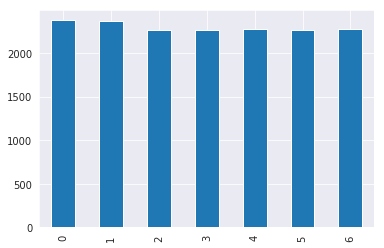

In [0]:
postal['dayOfWeek'].value_counts().sort_index().plot.bar()

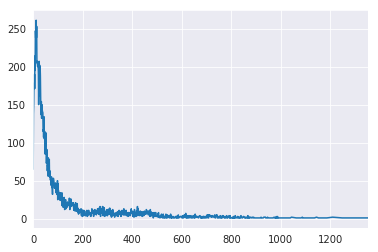

In [0]:
postal['BlueCars_taken_sum'].value_counts().sort_index().plot.line()

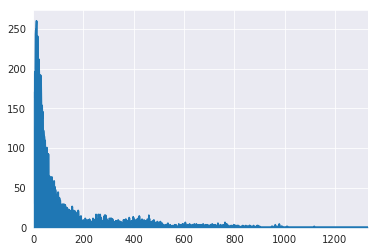

In [0]:
postal['BlueCars_returned_sum'].value_counts().sort_index().plot.area()

In [0]:
sns.Facetgrid(postal,hue='day_type',size=5).map(sns.displot,'BlueCars_taken_sum').add_legend()

AttributeError: ignored

# Kurt,Skew,Mean,Std

In [0]:

  print('\n')
  print(postal.kurt())
  print(postal.skew())
  print(postal.mean())
  print(postal.std())



Postal code               -0.542143
n_daily_data_points       36.594846
dayOfWeek                 -1.260994
BlueCars_taken_sum         6.172692
BlueCars_returned_sum      6.186288
Utilib_taken_sum           7.702362
Utilib_returned_sum        7.936357
Utilib_14_taken_sum        7.186815
Utilib_14_returned_sum     7.185463
Slots_freed_sum            6.454514
Slots_taken_sum            6.442553
dtype: float64
Postal code              -1.168778
n_daily_data_points      -5.742776
dayOfWeek                 0.018824
BlueCars_taken_sum        2.406355
BlueCars_returned_sum     2.412085
Utilib_taken_sum          2.556872
Utilib_returned_sum       2.578665
Utilib_14_taken_sum       2.510924
Utilib_14_returned_sum    2.511488
Slots_freed_sum           2.597406
Slots_taken_sum           2.596904
dtype: float64
Postal code               88791.293876
n_daily_data_points        1431.330619
dayOfWeek                     2.969599
BlueCars_taken_sum          125.926951
BlueCars_returned_sum       125

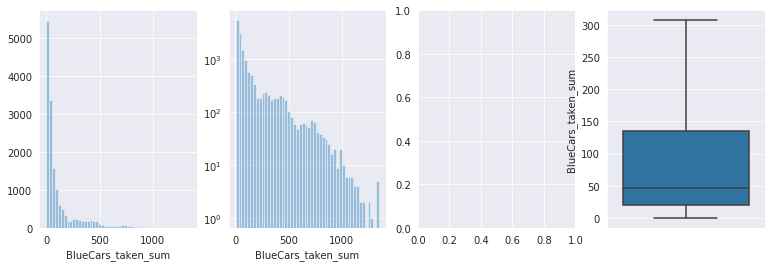

In [0]:

BlueCars_taken_sumfig, axs = plt.subplots(ncols = 4, figsize=(13, 4))

sns.distplot(postal.BlueCars_taken_sum.dropna(), kde=False, ax=axs[0])
second_plt = sns.distplot(postal.BlueCars_taken_sum.dropna()[postal.BlueCars_taken_sum > 2], kde=False, ax=axs[1])
sns.boxplot(postal.BlueCars_taken_sum, ax=axs[3], orient = 'v', showfliers=False)

second_plt.set_yscale('log')

# Bivariate Analysis

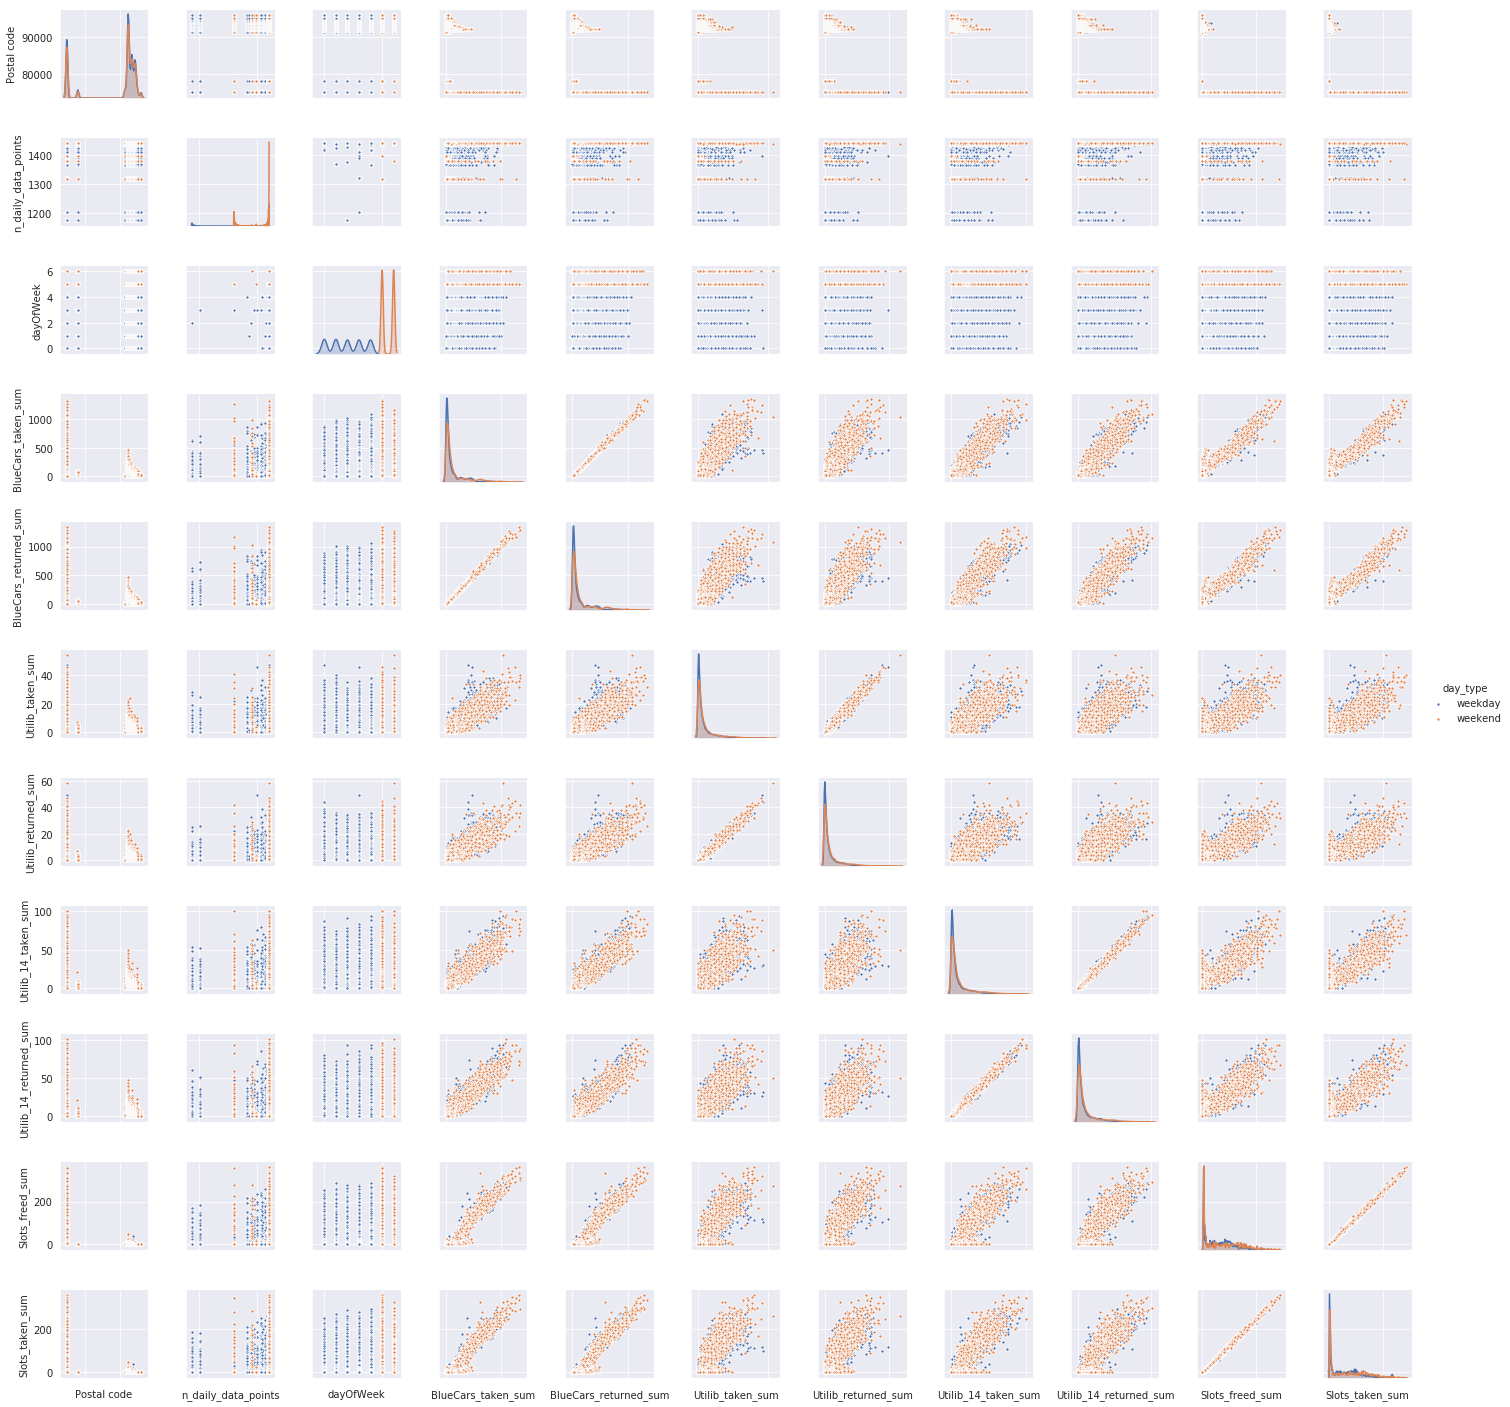

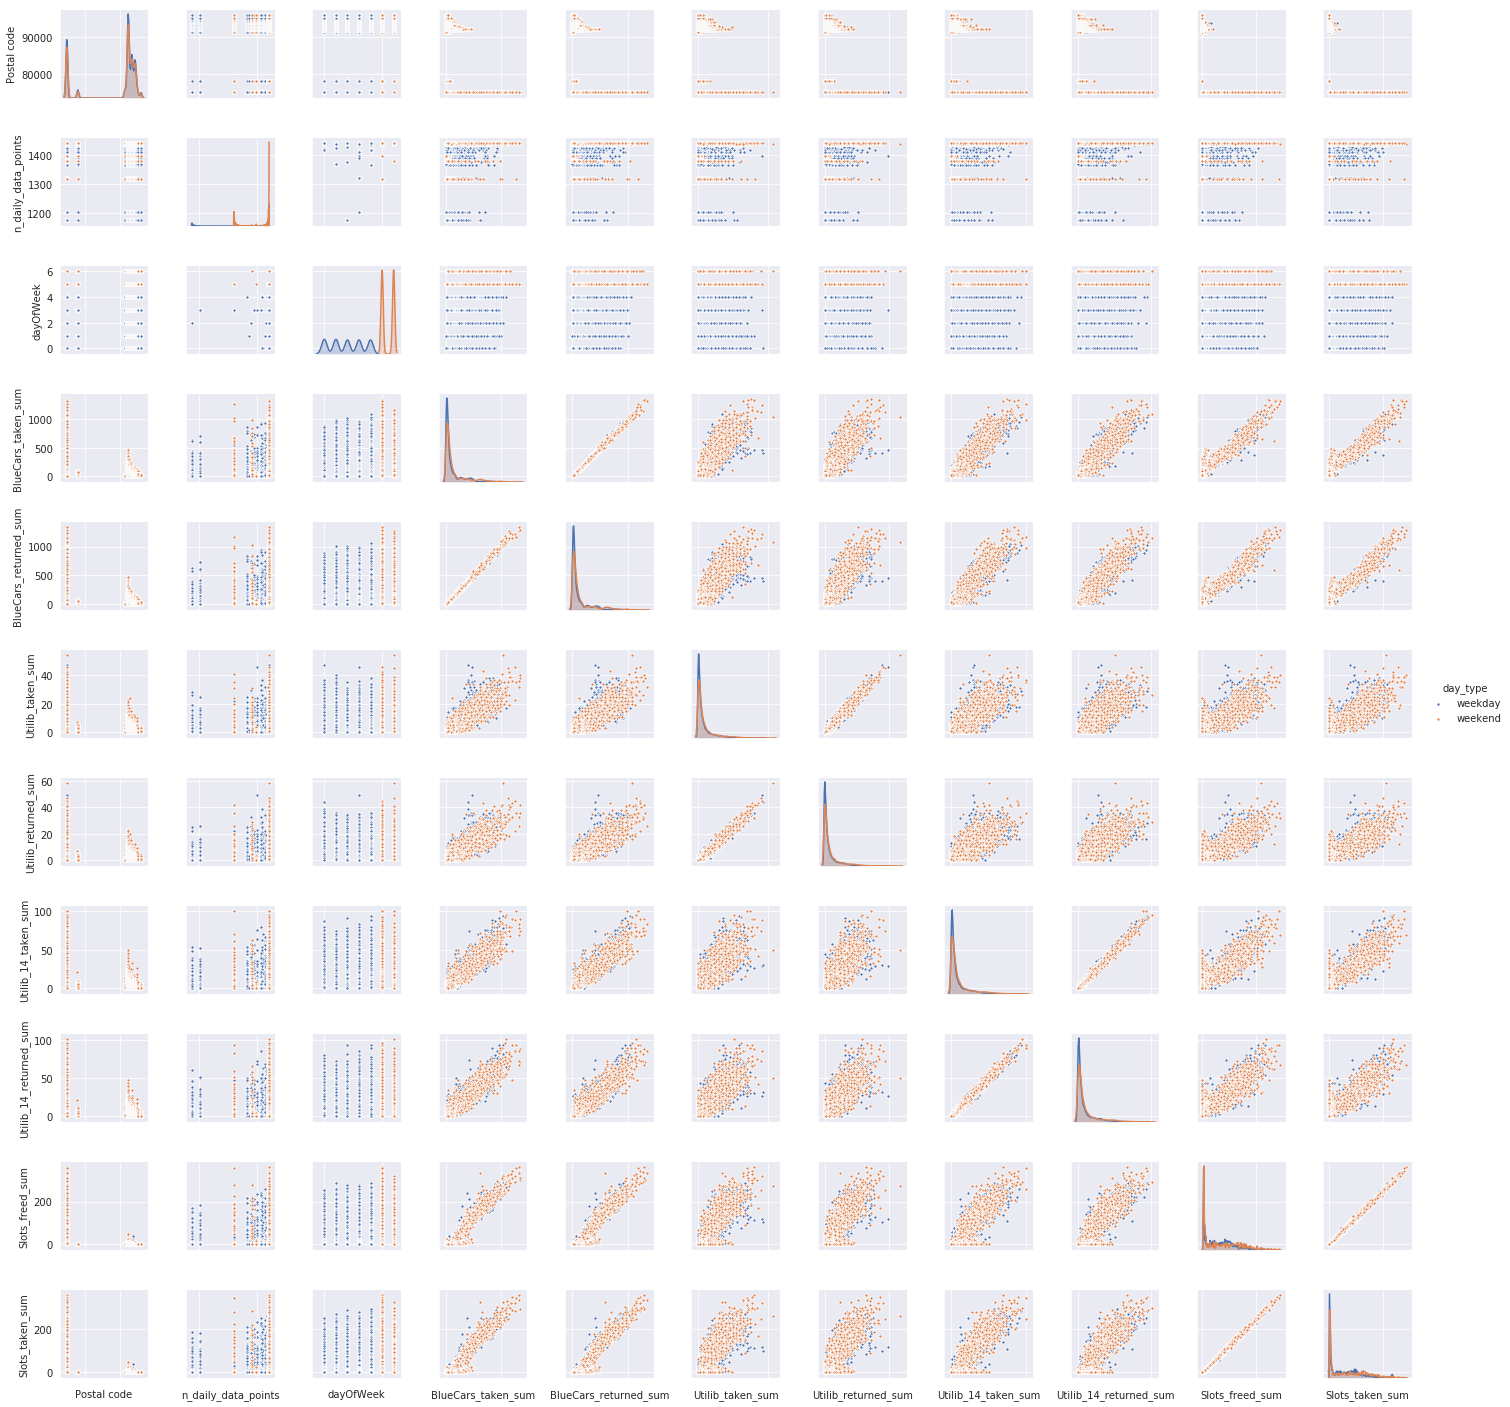

In [0]:
#pairplots for the entire dataset

pp = sns.pairplot(postal, hue = 'day_type', palette = 'deep', size=1.8, diag_kind = 'kde', diag_kws=dict(shade=True), plot_kws=dict(s=10) )
pp.set(xticklabels=[])#pair plots of entire dataset

pp = sns.pairplot(postal, hue = 'day_type', palette = 'deep', size=1.8, diag_kind = 'kde', diag_kws=dict(shade=True), plot_kws=dict(s=10) )
pp.set(xticklabels=[])

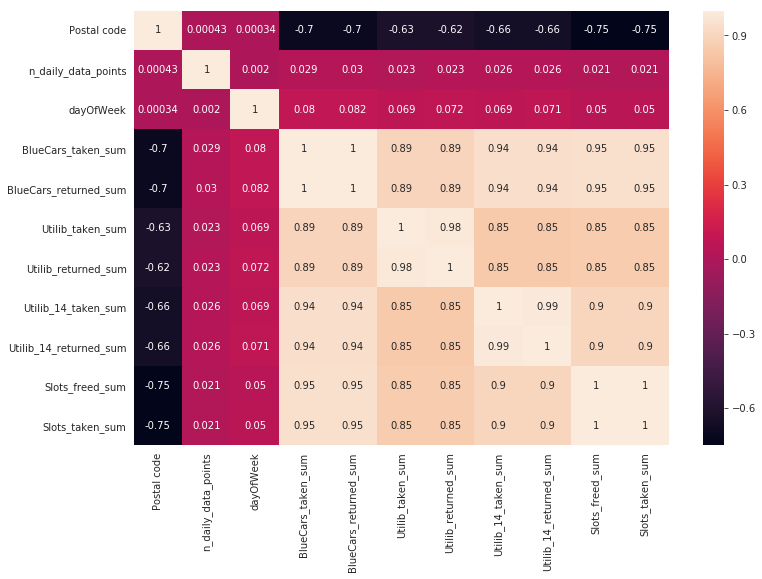

In [0]:
#Heatmap Correlation
plt.figure(figsize=(12, 8))

postal_corr = postal.corr()
sns.heatmap(postal_corr, 
            xticklabels = postal_corr.columns.values,
            yticklabels = postal_corr.columns.values,
            annot = True);

<Figure size 1008x1008 with 0 Axes>

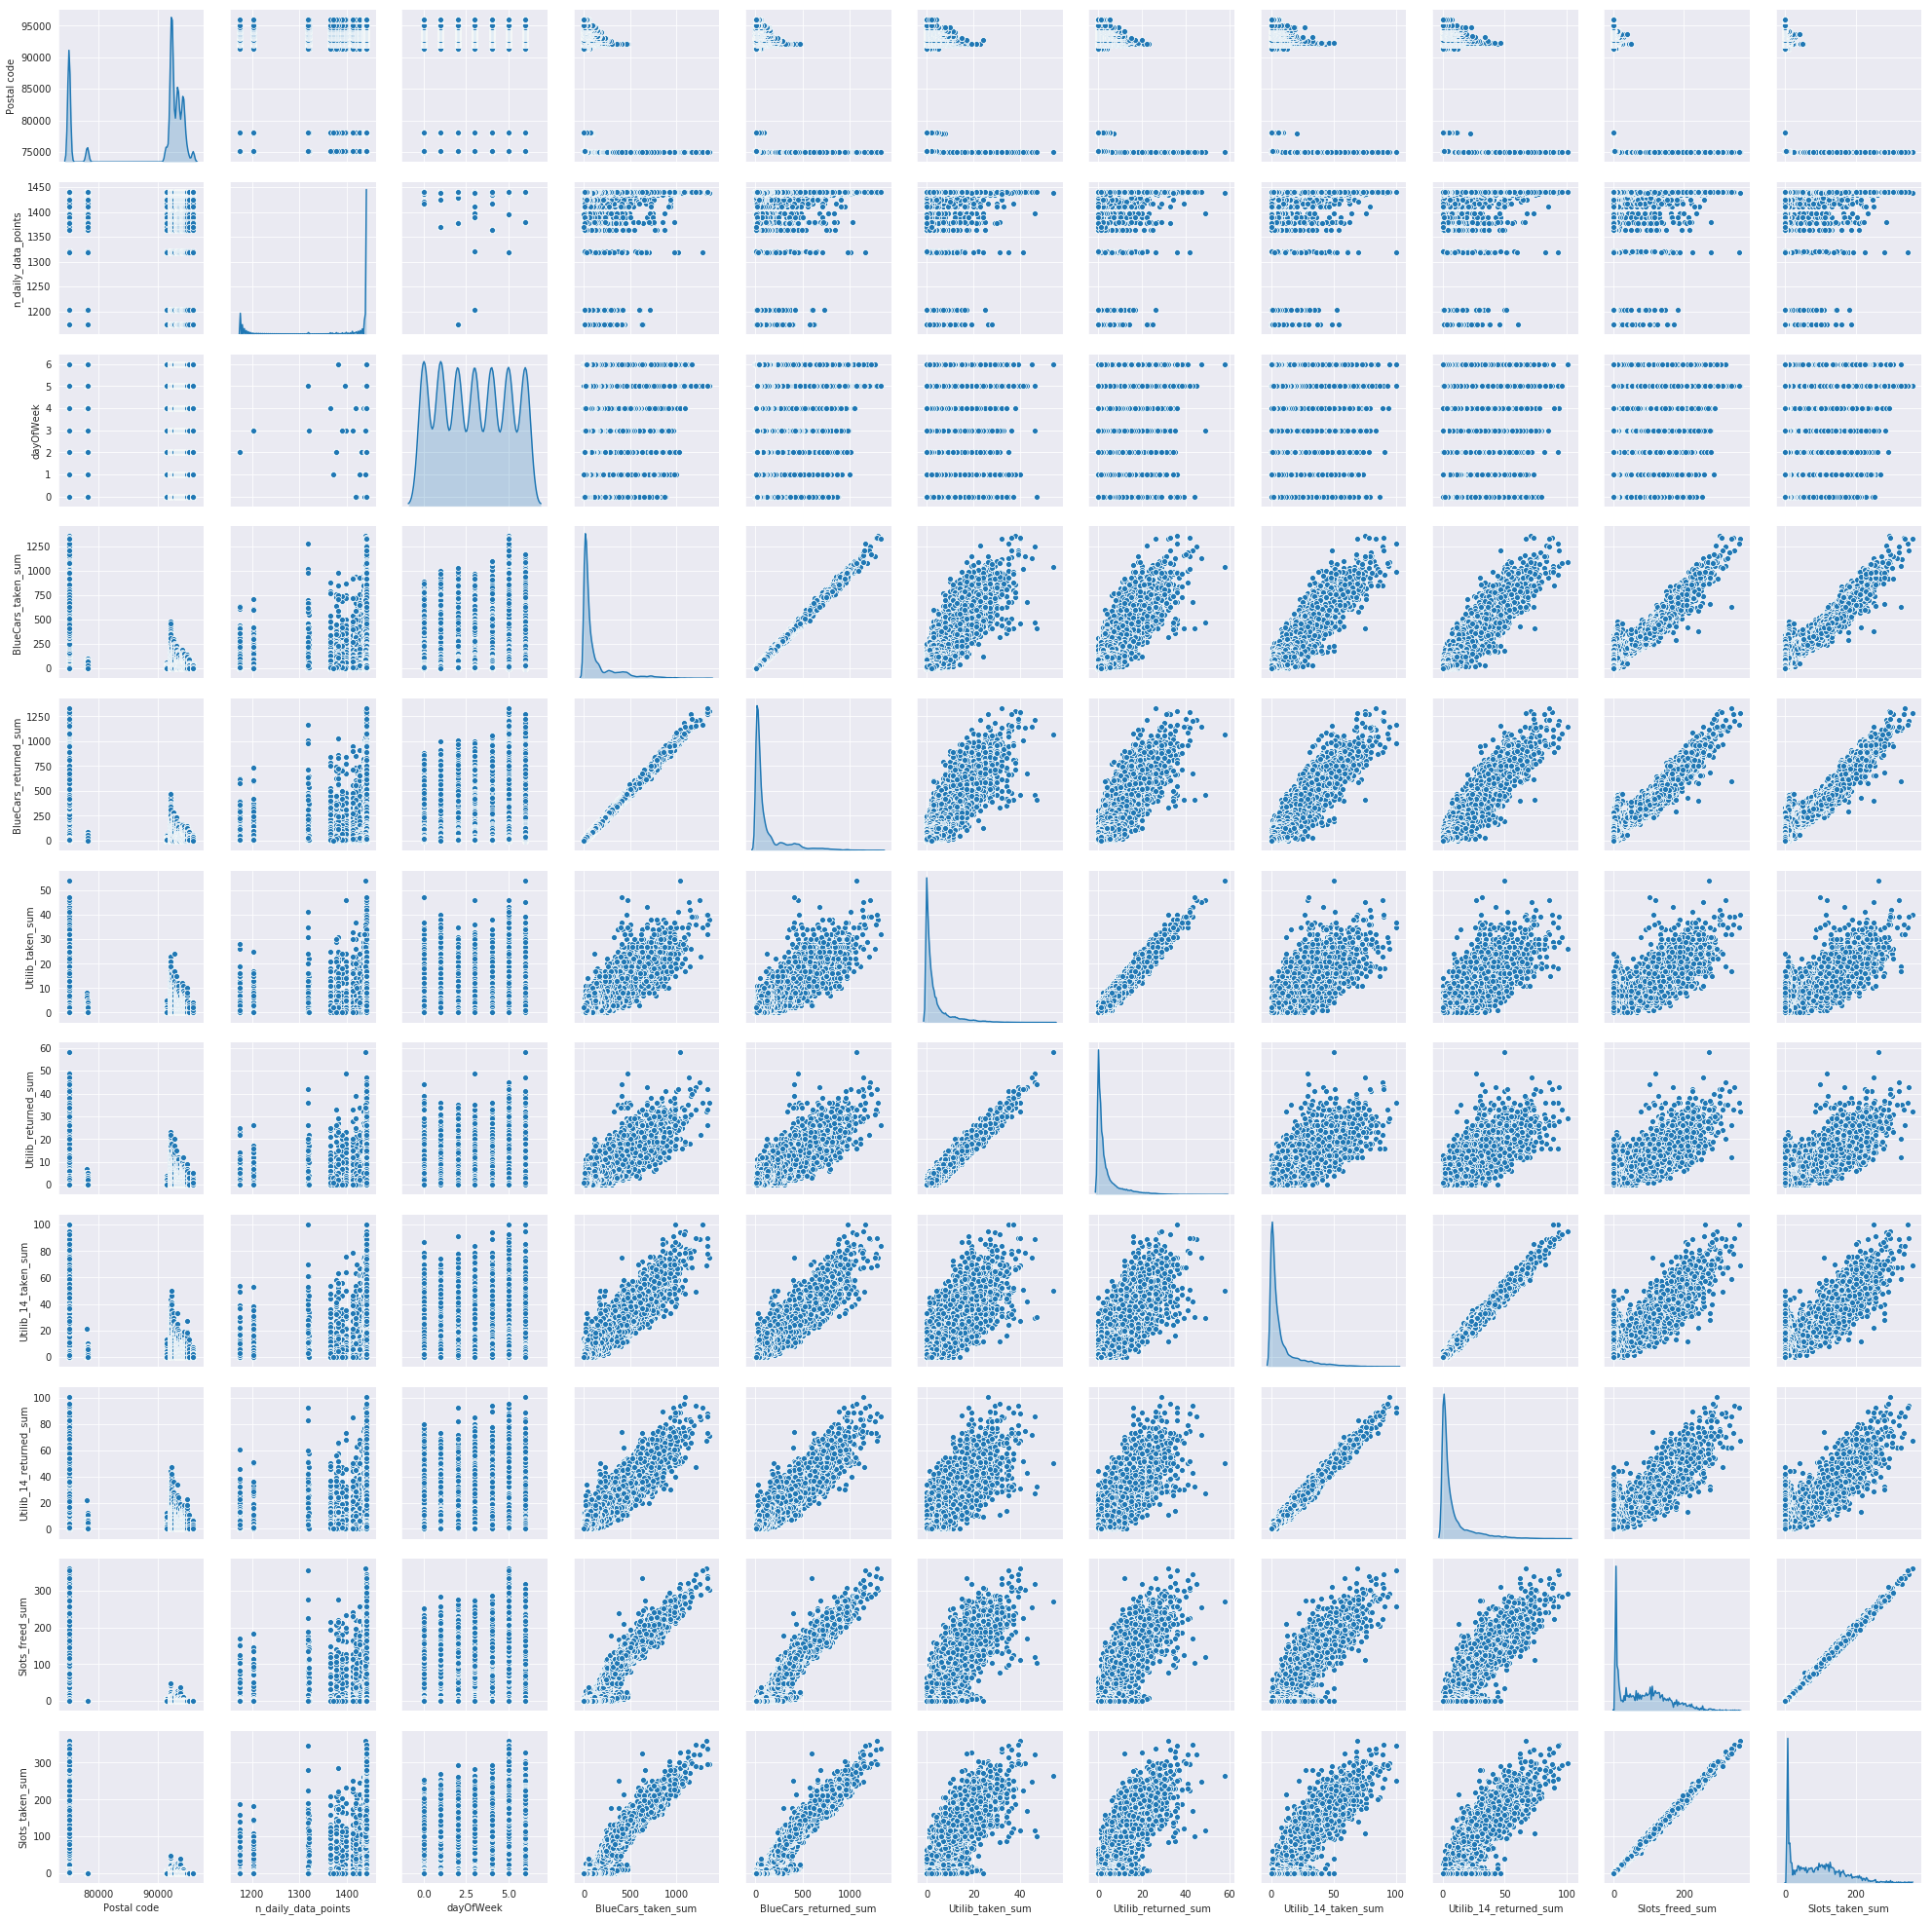

In [0]:
#Crossplots of the entire dataset
plt.figure(figsize=(14, 14))

sns.pairplot(postal, diag_kind='kde');

# Simple Random Sampling

In [65]:
#Splitting the dataset into two that is rows with weekdays and rows with weekends

day_type = [ frame for day_type, frame in postal.groupby('day_type') ]
day_type[0]


,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
5,75001,1/6/2018,1437,5,weekend,187,185,6,6,7,8,38,35
6,75001,1/7/2018,1440,6,weekend,180,180,2,2,10,9,34,34
12,75001,1/13/2018,1440,5,weekend,224,223,2,2,15,15,38,38
13,75001,1/14/2018,1440,6,weekend,193,193,2,2,12,12,22,20
19,75001,1/20/2018,1439,5,weekend,217,217,2,2,25,25,41,39
20,75001,1/21/2018,1440,6,weekend,143,150,4,4,8,8,23,25
26,75001,1/27/2018,1440,5,weekend,216,218,1,1,12,12,36,36
27,75001,1/28/2018,1440,6,weekend,190,189,5,5,10,10,32,30
33,75001,2/3/2018,1438,5,weekend,199,204,4,4,15,15,34,37
34,75001,2/4/2018,1440,6,weekend,186,180,2,2,17,17,36,33


# BAYESIAN HYPOTHESIS ESTIMATION

In [0]:
y1 = np.array(BlueCars_taken_sum)
y2 = np.array(Utilib_14_taken_sum)
y = pd.DataFrame(dict(value=np.r_[y1, y2], group=np.r_[['BlueCars_taken_sum']*len(BlueCars_taken_sum), ['Utilib_14_taken_sum']*len(Utilib_14_taken_sum)]))

y.hist('value', by='group', figsize=(12, 4));

In [0]:
#Since the means are real-valued, we will apply normal priors on them,and arbitrarily set the hyperparameters to the pooled empirical mean of the data 
#and twice the pooled empirical standard deviation,
#which applies very diffuse information to these quantities (and importantly, does not favor one or the other a priori).

μ_m = y.value.mean()
μ_s = y.value.std() * 2

with pm.Model() as model:
    group1_mean = pm.Normal('group1_mean', mu=μ_m, sd=μ_s)
    group2_mean = pm.Normal('group2_mean', mu=μ_m, sd=μ_s)

In [0]:
#We will instead set the group standard deviations to have a Uniform(1,10) prior:

σ_low = 1
σ_high = 10

with model:
    group1_std = pm.Uniform('group1_std', lower=σ_low, upper=σ_high)
    group2_std = pm.Uniform('group2_std', lower=σ_low, upper=σ_high)

In [0]:
#We follow Kruschke by making the prior for ν exponentially distributed with a mean of 30; this allocates high prior probability over the regions of the parameter that 
#describe the range from normal to heavy-tailed data under the Student-T distribution.

with model:
    ν = pm.Exponential('ν_minus_one', 1/29.) + 1

pm.kdeplot(np.random.exponential(30, size=10000), fill_kwargs={'alpha': 0.5});

In [0]:
#ince PyMC3 parameterizes the Student-T in terms of precision, rather than standard deviation,
#we must transform the standard deviations before specifying our likelihoods.

with model:
    λ1 = group1_std**-2
    λ2 = group2_std**-2

    group1 = pm.StudentT('drug', nu=ν, mu=group1_mean, lam=λ1, observed=y1)
    group2 = pm.StudentT('placebo', nu=ν, mu=group2_mean, lam=λ2, observed=y2)

In [0]:
# we will also estimate the “effect size”, which is the difference in means scaled by the pooled estimates of standard deviation

with model:
    diff_of_means = pm.Deterministic('difference of means', group1_mean - group2_mean)
    diff_of_stds = pm.Deterministic('difference of stds', group1_std - group2_std)
    effect_size = pm.Deterministic('effect size',
                                   diff_of_means / np.sqrt((group1_std**2 + group2_std**2) / 2))


In [0]:
#fit the model and evaluate its output.

In [8]:
with model:
    trace = pm.sample(2000)

In [0]:
#These summarize the posterior distributions of the parameters, and present a 95% credible interval and the posterior mean. 
#The plots below are constructed with the final 1000 samples from each of the 2 chains, pooled together.

pm.plot_posterior(trace, var_names=['group1_mean','group2_mean', 'group1_std', 'group2_std', 'ν_minus_one'],
                  color='#87ceeb');

In [0]:
#it also plots the potential scale reduction parameter, which is used to reveal evidence for lack of convergence;
#values near one, as we have here, suggest that the model has converged.

pm.plot_posterior(trace, var_names=['difference of means','difference of stds', 'effect size'],
                  ref_val=0,
                  color='#87ceeb');


In [0]:
pm.forestplot(trace, var_names=['group1_mean',
                                'group2_mean']);

In [0]:
pm.forestplot(trace, var_names=['group1_std',
                               'group2_std',
                               'ν_minus_one']);

In [0]:
pm.summary(trace, varnames=['difference of means', 'difference of stds', 'effect size'])